# Assignment 1C - Question 2
## Semantic Person Search

In [1]:
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
train = pd.read_csv('CAB420_Assessment_1C_Data/Data/Q2/Q2/Train_Data/Train.csv')
test = pd.read_csv('CAB420_Assessment_1C_Data/Data/Q2/Q2/Test_Data/Test.csv')

In [3]:
train_img = []
gnd_img = []
files = glob.glob('CAB420_Assessment_1C_Data/Data/Q2/Q2/Train_Data/Originals/*.png')
for myfile in files:
    image = cv2.imread(myfile, 0)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gnd_img.append(myfile[58:])
    train_img.append(image)

train_img = np.array(train_img)
gnd_img = np.array(gnd_img)

print('Training shape: ', train_img.shape)
print('Training gnd: ', gnd_img[1:10])

Training shape:  (520,)
Training gnd:  ['A_0001_01_083.png' 'A_0001_03_126.png' 'A_0001_05_051.png'
 'A_0002_01_021.png' 'A_0002_04_011.png' 'A_0002_08_051.png'
 'A_0003_03_131.png' 'A_0003_04_026.png' 'A_0003_08_091.png']
<ipython-input-3-f69faf1da998>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  train_img = np.array(train_img)


In [4]:
test_originals = []
gnd_test = []
files = glob.glob('CAB420_Assessment_1C_Data/Data/Q2/Q2/Test_Data/Originals/*.png')
for myfile in files:
    image = cv2.imread(myfile)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gnd_test.append(myfile[57:])
    test_originals.append(image)

test_originals = np.array(test_originals)
gnd_test = np.array(gnd_test)
print('Testing shape: ', test_originals.shape)
print('Testing gnd: ', gnd_test[1:10])

<ipython-input-4-1cf7ccf836f0>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  test_originals = np.array(test_originals)
Testing shape:  (196,)
Testing gnd:  ['cam3-2_frame_2500_pos_419_514_86_253.png'
 'cam3-2_frame_4000_pos_457_520_110_276.png'
 'cam3-2_frame_7750_pos_348_432_159_358.png'
 'cam3_frame_17250_pos_295_380_292_496.png'
 'cam3_frame_19000_pos_400_505_215_423.png'
 'cam3_frame_23750_pos_416_502_134_319.png'
 'cam3_frame_24250_pos_361_469_233_465.png'
 'cam3_frame_25750_pos_355_455_158_342.png'
 'cam3_frame_33000_pos_316_412_160_354.png']


In [5]:
train = train.drop(columns=['torcol2','torcol3','tortex','torcol3','legcol2','legcol3','legtex','pose'])
print(train)

              filename  gender  tortyp  torcol  legtyp  legcol  luggage
0    A_0001_01_001.png       0       1       3       1       4        0
1    A_0001_01_083.png       0       1       3       1       4        0
2    A_0001_03_126.png       0       1       3       1       4        0
3    A_0001_05_051.png       1       1       9       0       0        1
4    A_0002_01_021.png       1       1       4       0       0        0
..                 ...     ...     ...     ...     ...     ...      ...
515       ip54_038.png       0       0       3       1       1        0
516       ip54_039.png       0       1       0       0       1        1
517       ip54_040.png       1       0       8       1       0        0
518       ip54_041.png       0       1       9       1       4        1
519       ip54_042.png       0       0       0       0       0        1

[520 rows x 7 columns]


In [6]:
test = test.drop(columns=['torcol2','torcol3','tortex','torcol3','legcol2','legcol3','legtex','pose'])
print(test)

                                              filename  gender  tortyp  \
0    ip54-subjects_frame_14800_pos_478_703_223_649.png       0       1   
1    ip53-subjects_frame_52600_pos_516_701_242_627.png       0       1   
2    ip70-subjects_frame_164400_pos_193_294_127_384...       0       1   
3     ip53-subjects_frame_7600_pos_638_783_169_453.png       1       0   
4    ip53-subjects_frame_61600_pos_520_700_283_681.png       1       1   
..                                                 ...     ...     ...   
191            cam8_frame_58750_pos_269_365_92_303.png       0       0   
192  ip70-subjects_frame_43800_pos_779_948_291_601.png       1       1   
193  ip54-subjects_frame_183400_pos_308_506_196_521...       0       0   
194   ip70-subjects_frame_82200_pos_825_927_75_290.png       0       1   
195  ip53-subjects_frame_50800_pos_471_638_176_481.png       0       1   

     torcol  legtyp  legcol  luggage  
0         8       1       1        0  
1         1       0       4      

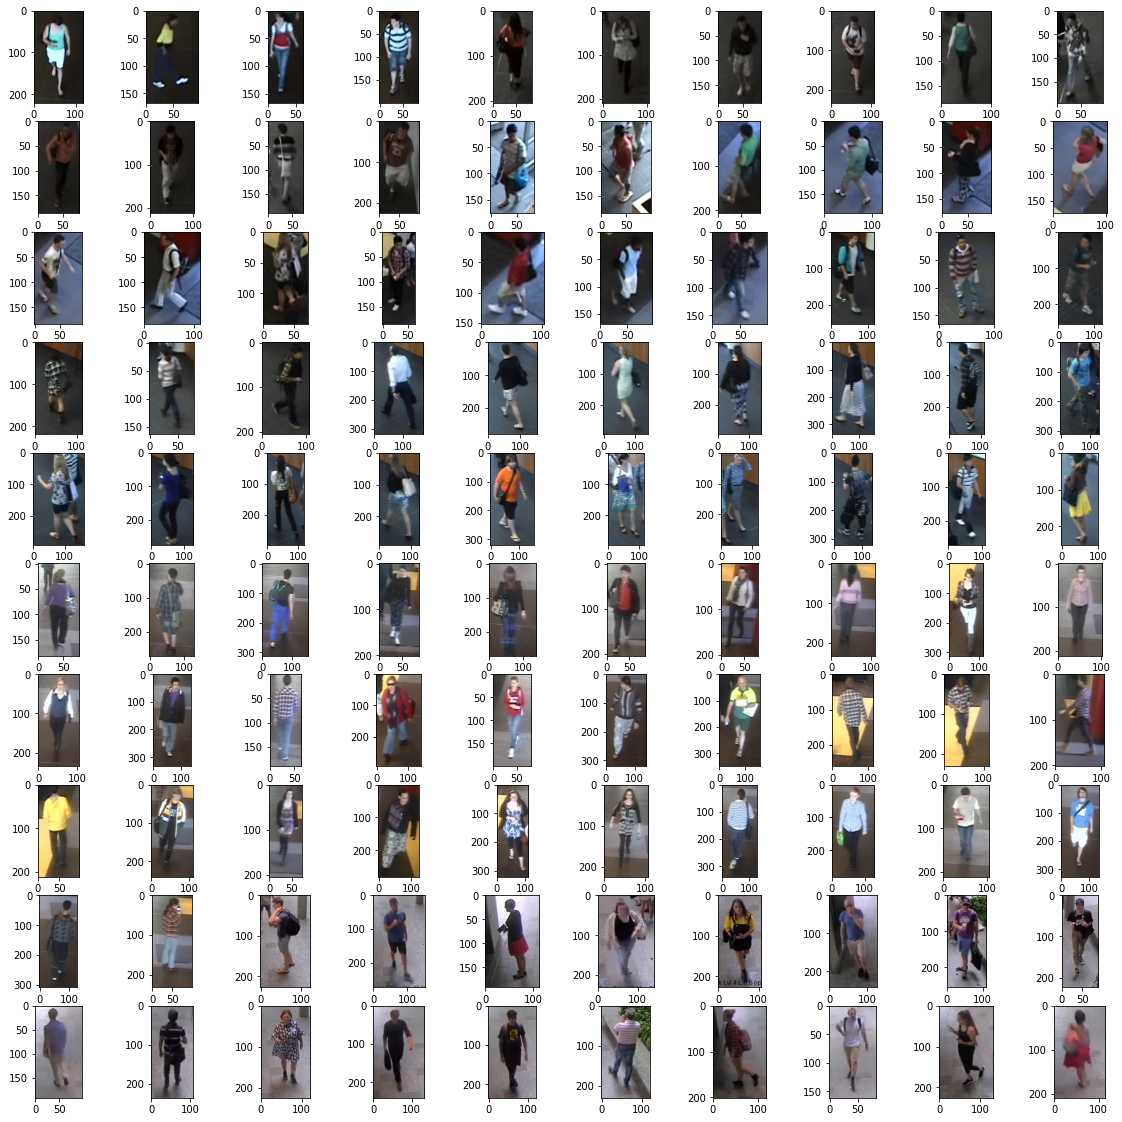

In [7]:
#fig = plt.figure(figsize=[20, 20])
#for i in range(100):
#    ax = fig.add_subplot(10, 10, i + 1)
#    ax.imshow(test_originals[i])

In [ ]:
inp = Input(shape = (100,100,3))
x = Conv2D(32, (3, 3), padding = 'same')(inp)
x = Activation('relu')(x)
x = Conv2D(32, (3, 3))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.25)(x)
x = Conv2D(64, (3, 3), padding = 'same')(x)
x = Activation('relu')(x)
x = Conv2D(64, (3, 3))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(512)(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
output1 = Dense(1, activation = 'sigmoid')(x)
output2 = Dense(1, activation = 'sigmoid')(x)
output3 = Dense(1, activation = 'sigmoid')(x)
output4 = Dense(1, activation = 'sigmoid')(x)
output5 = Dense(1, activation = 'sigmoid')(x)
model = Model(inp,[output1,output2,output3,output4,output5])
model.compile(optimizers.rmsprop(lr = 0.0001, decay = 1e-6),
loss = ["binary_crossentropy","binary_crossentropy","binary_crossentropy","binary_crossentropy","binary_crossentropy"],metrics =["accuracy"])
model.fit_generator(generator=generator_wrapper(train_generator),steps_per_epoch=STEP_SIZE_TRAIN)



history = model.fit(x_train, y_train,
                        batch_size=32,
                        epochs=10,
                        validation_split=0.2, verbose=True)